PIL(Python Imaging Library) — библиотека Python предназначена для работы с растровой графикой.

Текущей бесплатной версией является PIL 1.1.7 . Этот выпуск поддерживает Python 1.5.2 и новее, включая версии 2.5 и 2.6. Последняя правка PIL датируется 2011 годом. Однако существует проект под названием Pillow, являющийся форком PIL, развивается и включает, в том числе, поддержку Python 3.x, что PIL никогда не делал. Обратите внимание, что вы не можете одновременно устанавливать как PIL, так и Pillow. В их документации есть некоторые предупреждения, в которых перечислены некоторые различия между ними. Сегодня мы будем использовать Pillow.

Итак, для начала установим Pillow, набрав простую команду:

pip install Pillow

Я расскажу вам о самых используемых Модулях PIL, больше вы можете узнать в официальной документации:
    https://pillow.readthedocs.io/en/5.3.x/#

Давайте создадим нашу картинку. Для того понадобится модуль Image и ImageDraw.
ImageDraw Модуль обеспечивает простые 2D - графики для Imageобъектов. 
Вы можете использовать этот модуль для создания новых изображений, аннотировать или ретушировать существующие изображения
и генерировать графики «на лету» для использования в Интернете.


PIL.Image.open( fp , mode = 'r' ) - Открывает и идентифицирует данный файл изображения.
PIL.Image.new( режим , размер , цвет = 0 ) - Создает новое изображение с заданным режимом и размером.
.show
.text

In [301]:
from PIL import Image
from PIL import ImageDraw
text = "Hi,PIL!" #задаем текст
color = (300, 100, 200) #выбираем цвет
img = Image.new('RGB', (300, 100), color) #создаем изображение
imgDrawer = ImageDraw.Draw(img) #создаем объект для рисования
imgDrawer.text((10, 20), text) #рисуем текст
img.save("my_picture.png")
img.show()

Вы можете получить много информации об изображении, используя Pillow. Давайте рассмотрим лишь несколько небольших примеров того, что мы можем извлечь:

In [302]:
img = Image.open('my_picture.png') #открываем картинку
size = img.size #размер картинки
format = img.format #формат картинки
mode = img.mode #мод
arr = [] #создаем пустой массив 
arr.append(size)  #добавляем размер в массив
arr.append(format) #добавляем формат в массив
arr.append(mode)  #добавляем мод в массив
print(arr) #выводим массив

[(300, 100), 'PNG', 'RGB']


Для демонстрации следующих возможностей, создадим еще одно изображение:

In [303]:
from PIL import Image
from PIL import ImageDraw
text = "Hi,PIL! :)"
color = (0, 100, 300) 
img = Image.new('RGB', (300, 100), color) 
imgDrawer = ImageDraw.Draw(img) 
imgDrawer.text((10, 20), text) 
img.save("my_picture2.png")
img.show()

Функция PIL.Image.blend(im1, im2, alpha) создает новое изображение, интерполируя между двумя входными изображениями, используя константу alpha. 
im1 - Первое изображение.
im2 - второе изображение. Должено иметь тот же режим и размер, что и первое изображение.
alpha - Интерполяционный альфа-фактор. Если альфа 0.0, возвращается копия первого изображения. Если альфа 1.0, возвращается копия второго изображения. Нет никаких ограничений на значение альфа. При необходимости результат обрезается, чтобы вписаться в допустимый выходной диапазон.

In [304]:
im1=Image.open('my_picture.png')
im2=Image.open('my_picture2.png')
im3=Image.blend( im1 , im2, 0.5) 
im3.show()

Другая функция - Image.convert( mode = None , matrix = None , dither = None , palette = 0 , colors = 256 ) возвращает преобразованную копию этого изображения. 

mode - запрошенный режим. См. Режимы: https://pillow.readthedocs.io/en/5.3.x/handbook/concepts.html#concept-modes
matrix - необязательная матрица преобразования. Если задано, это должно быть 4- или 12-кортеж, содержащий значения с плавающей запятой.
dither - Метод сглаживания , используемый при преобразовании из режима «RGB» в «P» или из «RGB» или «L» в «1». Доступные методы: NONE или FLOYDSTEINBERG (по умолчанию). Обратите внимание, что это не используется, когда поставляется матрица .
palette - Палитра, используемая при преобразовании из режима «RGB» в «P». Доступные палитры являются WEB или ADAPTIVE.
colors - количество цветов для палитры ADAPTIVE. По умолчанию 256.

Например:
Режим «1» - для преобразования изображения в оттенках серого («L») или «RGB» в изображение «bilevel»

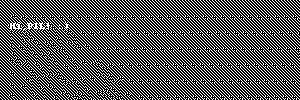

In [131]:
im2.convert( mode = "1" , matrix = None , dither = None , palette = 0 , colors = 256 )

Режим «L» - в оттенки серого:

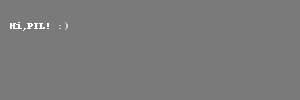

In [132]:
im3.convert( mode = "L" , matrix = None , dither = None , palette = 0 , colors = 256 )

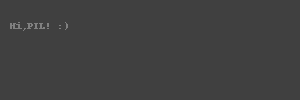

In [133]:
im3.convert( mode = "L" , matrix = (0.5, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0) , dither = None , palette = 0 , colors = 256 ) 

В следующем примере преобразуется изображение RGB в цветовое пространство CIE XYZ:

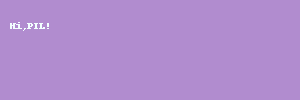

In [134]:
rgb2xyz = (
    0.412453, 0.357580, 0.180423, 0,
    0.212671, 0.715160, 0.072169, 0,
    0.019334, 0.119193, 0.950227, 0 )

im1.convert("RGB", rgb2xyz)

Image.crop( box = None ) Возвращает прямоугольную область из этого изображения. 
box представляет собой 4-кортеж, определяющий координату влево, вправо, вправо и в нижнем пикселе. Следует помнить, что библиотека изображений Python использует картографическую систему координат пикселей, с (0,0) в верхнем левом углу.

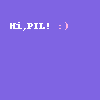

In [136]:
im3.crop( box = (0,0,100,100) )

Image.paste( im , box = None , mask = None ) Вставляет другое изображение в это изображение.

In [285]:
im1.paste(im3.crop( box = (0,0,100,100) ))
im1.show()

Image.rotate( угол , resample = 0 , expand = 0 , center = None , translate = None , fillcolor = None ) Возвращает повернутую копию этого изображения. 

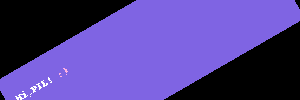

In [294]:
im3.rotate(30 , resample = 0 , expand = 0 , center = None , translate = None , fillcolor = None )

Image.thumbnail( размер , resample = 3 ) Этот метод изменяет изображение, чтобы содержать версию миниатюры, не превышающую заданный размер.

In [306]:
img=im2
img.resize( (100,100) , resample = 0 , box = None )
img.show()

Другой модуль ImageFilter содержит определение для заранее определенного набора фильтров, которые могут быть использоваться с Image.filter() методом. См. фильтры: https://pillow.readthedocs.io/en/5.3.x/reference/ImageFilter.html
Например:

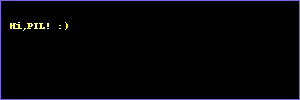

In [137]:
from PIL import ImageFilter
im3.filter(ImageFilter.FIND_EDGES)

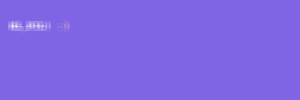

In [138]:
im3.filter(ImageFilter.BLUR)

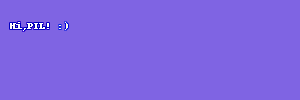

In [141]:
im3.filter(ImageFilter.EDGE_ENHANCE)

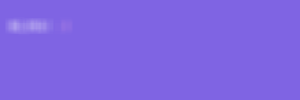

In [150]:
im3.filter(ImageFilter.BoxBlur(5)) 

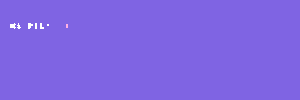

In [148]:
im3.filter(ImageFilter.MedianFilter( size = 3 ) )

Следующий модуль ImageChops содержит ряд арифметических операций изображения, называемые операции канала ( «отбивные»). Они могут использоваться для различных целей, включая специальные эффекты, композиции изображений, алгоритмическую роспись и многое другое.

ImageChops.add( image1 , image2 , scale = 1.0 , offset = 0 ) добавляет два изображения, разделяя результат по шкале и добавляя смещение. Если опустить, значение масштаба по умолчанию равно 1,0 и смещено до 0,0.

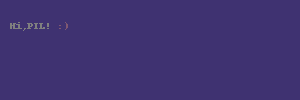

In [166]:
from PIL import ImageChops
ImageChops.add( im1 , im2 , scale = 4.0 , offset = 0 ) 

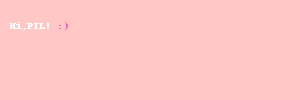

In [167]:
ImageChops.add_modulo( im1 , im2 )  #Добавляет два изображения без обрезки результата

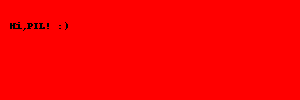

In [180]:
ImageChops.subtract( im1 , im2 , scale = 1.0 , offset = 0 ) #Вычитает два изображения по шкале со смещением

Сравнивает два изображения, пиксель за пикселем и возвращает новое изображение, содержащее более темные значения:

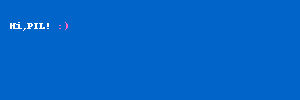

In [175]:
ImageChops.darker( im1 , im2 ) 

Возвращает абсолютное значение пиксельной разницы между двумя изображениями.

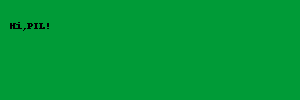

In [177]:
ImageChops.invert( im1 ) #Инвертирует изображение 

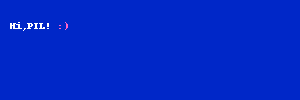

In [179]:
ImageChops.multiply( im1 , im2 ) #Накладывает друг надруга

ImageDraw обеспечивает простые 2D - графики для Imageобъектов. Вы можете использовать этот модуль для создания новых изображений, аннотации или ретуширования существующих изображений, а также для генерации графики «на лету» для использования в Интернете.
Нарисуем крест на изображении:

In [237]:
from PIL import Image, ImageDraw

im = Image.open("my_picture.png")

draw = ImageDraw.Draw(im)
draw.line((0, 0) + im.size, fill=128)
draw.line((0, im.size[1], im.size[0], 0), fill=128)

im.show()

ImageDraw.point( xy , fill = None ) pисует точки (отдельные пиксели) в заданных координатах:

In [238]:
import random
items = [(random.randint(0, 300),random.randint(0, 100)) for i in range(100)]
draw.point( items , fill = 230 ) 
im.show()

ImageDraw.polygon( xy , fill = None , outline = None ) pисует многоугольник:

In [239]:
draw.polygon( [(100, 60), (10, 10), (155,90), (20,90), (100,100)] , fill = None , outline = None ) 
im.show()

ImageDraw.text() рисует строку в заданной позиции

In [241]:
draw.text((50, 50), "What's up?", fill=None, font=None, anchor=None, spacing=0, align="left", direction=None, features=None)
im.show()

Модуль ImageEnhance содержит ряд классов , которые могут быть использованы для улучшения изображения:
Все классы повышения реализуют общий интерфейс, содержащий один метод:Все классы повышения реализуют общий интерфейс, содержащий один метод: enhance(factor) - Возвращает улучшенное изображение (яркость, контрастность и тд)
ImageEnhance.Color( image ) - регулирует баланс цвета изображения.
ImageEnhance.Contrast( image ) - регулирует контрастность изображения.
ImageEnhance.Sharpness( image ) - регулирует резкость изображения.

In [2]:
im3.show()

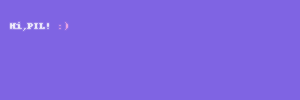

In [245]:
from PIL import ImageEnhance
im = ImageEnhance.Sharpness(im3)
im.enhance(0.2)

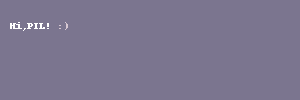

In [250]:
im = ImageEnhance.Color(im3)
im.enhance(0.2)

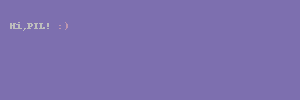

In [256]:
im = ImageEnhance.Contrast(im3)
im.enhance(0.5)

Еще один полезный модуль ImageGrab может быть использован для копирования содержимого экрана или буфера обмена в PIL память изображения.

In [260]:
from PIL import ImageGrab
im4=ImageGrab.grab(bbox=(0,0,500,500))
im4.show()

Также с помощью модуля ImageSequence мы можем получить отдельные кадры из анимации

In [282]:
from PIL import ImageSequence

im = Image.open("C:/Users/позитроника/Desktop/orig.gif")

index = 1
for frame in ImageSequence.Iterator(im):
    frame.save("frame%d.png" % index)
    index += 1
    

В заключении хочу отметить, что модули ImageQt и ImageTk библиотеки Python Imaging Library содержат поддержку для создания и редактирования PyQt4, PyQt5, PySide, Tkinter BitmapImage и PhotoImage объектов из PIL изображений.